Importing Neccessary Data Science Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import velocity_testing_functions as vtf
from scipy.optimize import least_squares

Creating a DTS_recording Class so results can be manipulated and plotted quickly

In [123]:
class DTS_recording:
    def __init__(self,frame_by_frame_distance_array,frames_per_second):
        self.frame_by_frame_distance_array = [abs(i - frame_by_frame_distance_array[0]) for i in frame_by_frame_distance_array]        
        self.frames_per_second = frames_per_second
        self.constant_time_array = [i/self.frames_per_second for i in range(len(self.frame_by_frame_distance_array))]
        self.change_in_frame_by_frame_distance_array = np.diff(self.frame_by_frame_distance_array)
        self.velocities = self.change_in_frame_by_frame_distance_array * self.frames_per_second / 1000
        self.median_velocity = np.median(self.velocities)
        self.mean_velocity = np.mean(self.velocities)
    
    
    def rolling_average(self,number_of_points):
        data_array = np.array(self.change_in_frame_by_frame_distance_array)
        moving_avg = np.convolve(data_array, np.ones(number_of_points)/number_of_points, mode='valid')
        return moving_avg
        
    def Distance_Time_Velocity_Time_stacked_plot(self):
        plt.figure(figsize=(18,10))
        sns.set_style('darkgrid')

        plt.subplot(2,1,1)
        plt.scatter(self.frame_by_frame_distance_array,self.constant_time_array)
        plt.title("Relationship between Distance Traveled (mm) and Time elapsed (s) for the DTS system at {velocity} m/s".format(velocity = self.median_velocity ))
        plt.ylabel("Time (s)")
        plt.xlabel("Distance traveled (mm)")

        plt.subplot(2,1,2)   
        plt.scatter(self.frame_by_frame_distance_array[:-1],self.velocities)     
        plt.title("Relationship between Distance Traveled (mm) and the corresponding velocity in m/s for the DTS system at {velocity} m/s".format(velocity = self.median_velocity))
        plt.xlabel("Distance traveled (mm)")
        plt.ylabel("Velocity at distance (m/s)")

    def Histogram(self):
        plt.figure(figsize=(18,5))
        sns.histplot(self.velocities,kde=True)
        plt.xlabel("Velocity (m/s) at specifc distance")
        plt.title("Histogram detailing distribrution of Velocities during Testing")

    def rolling_average_velocity_distance_plot(self,number_of_points):
        plt.figure(figsize = (18,5))
        plt.scatter(range(len(self.rolling_average(number_of_points))),self.rolling_average(number_of_points))
        plt.title("Relationship between Distance Traveled (mm) and the corresponding velocity in m/s for the DTS system at {velocity} m/s".format(velocity = self.median_velocity))
        plt.xlabel("Distance traveled (mm)")
        plt.ylabel("Velocity at distance (m/s)")

Import Results and Create an Object for each Test

In [124]:
from DTS_frame_by_frame_displacement_results import C0494_frame_by_frame_distance_array

C0494 = DTS_recording(C0494_frame_by_frame_distance_array,1000)

Creating Visulisations of the Results

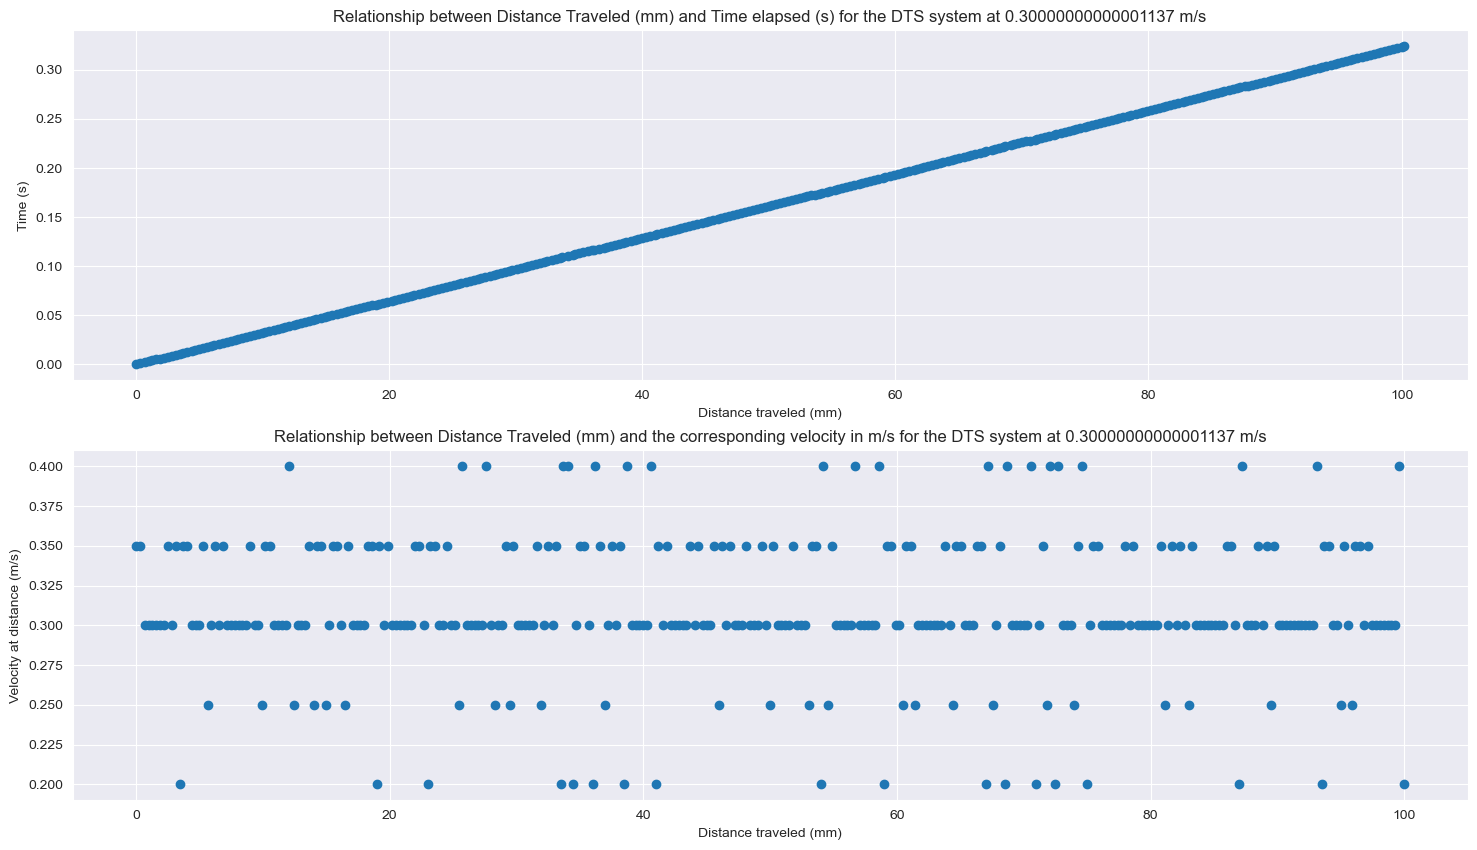

In [125]:
C0494.Distance_Time_Velocity_Time_stacked_plot()

Other Visulisations

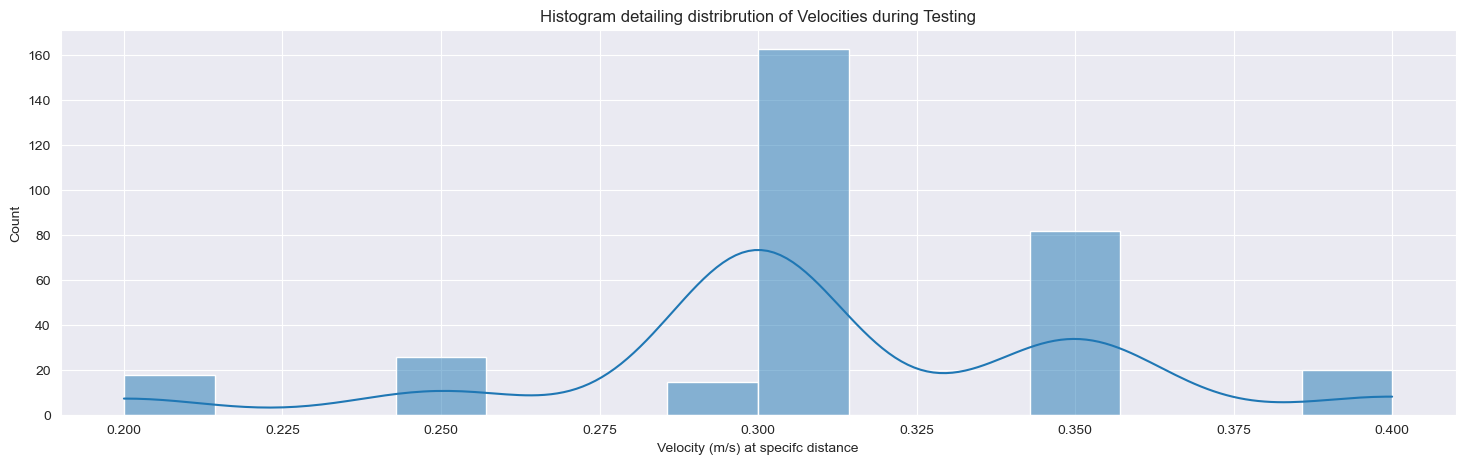

In [126]:
C0494.Histogram()

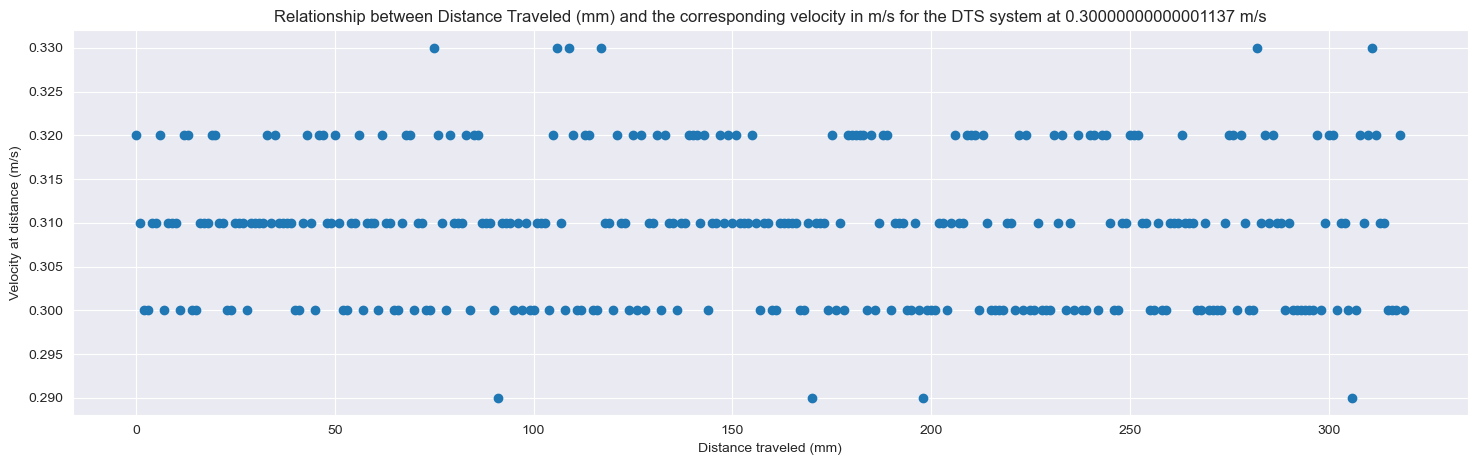

In [127]:
C0494.rolling_average_velocity_distance_plot(5)

Percentage Error Calculations

In [128]:
print("median = {median}, mean = {mean}".format(mean = C0494.mean_velocity,median = C0494.median_velocity))


real_distance_traveled = C0494.frame_by_frame_distance_array[-1]/ 1000
mean_theoretical_distance = C0494.mean_velocity * C0494.constant_time_array[-1]
median_theoretical_distance = C0494.median_velocity * C0494.constant_time_array[-1]

median_percentage_error = ((real_distance_traveled / median_theoretical_distance) - 1) * 100
mean_percentage_error = ((real_distance_traveled / mean_theoretical_distance) - 1) * 100

print("median percentage error = {median} \nmean percentage error = {mean}".format (median = median_percentage_error, mean = mean_percentage_error))

median = 0.30000000000001137, mean = 0.30925925925925923
median percentage error = 3.0864197530825033 
mean percentage error = -1.1102230246251565e-14


R-squared score: 0.9999970034059379
Mean absolute percentage error (MAPE): 0.045383052176502625


(128.0, 135.0)

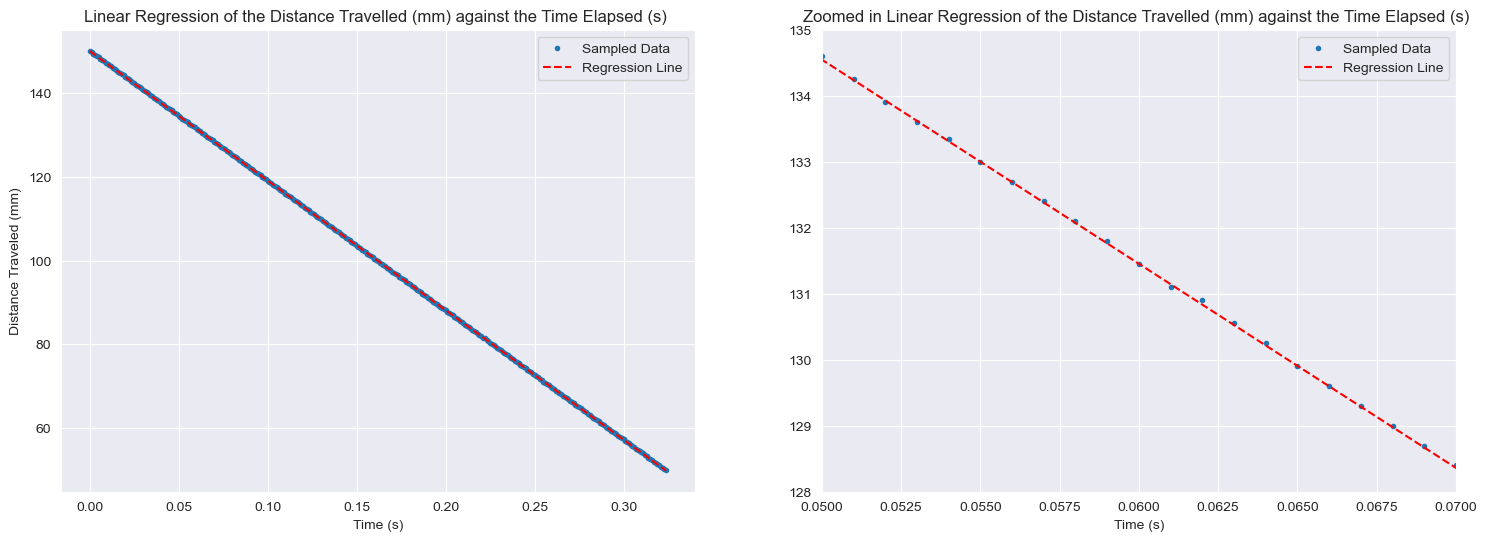

In [170]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.arange(len(C0494_frame_by_frame_distance_array)).reshape((-1, 1)) * 1/1000  
y = np.array(C0494_frame_by_frame_distance_array)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)

r_squared = model.score(x, y)

n = len(C0494_frame_by_frame_distance_array)
mape = (1 / n) * np.sum(np.abs(y - y_pred) / y) * 100

print("R-squared score:", r_squared)
print("Mean absolute percentage error (MAPE):", mape)

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.scatter(x,y,marker= '.',label = "Sampled Data")
plt.plot(x, y_pred,'--', color = 'red', label="Regression Line")
plt.xlabel('Time (s)')
plt.ylabel('Distance Traveled (mm)')
plt.title('Linear Regression of the Distance Travelled (mm) against the Time Elapsed (s) ')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(x,y,marker= '.',label = "Sampled Data")
plt.plot(x, y_pred,'--', color = 'red', label="Regression Line")
plt.xlabel('Time (s)')
plt.title('Zoomed in Linear Regression of the Distance Travelled (mm) against the Time Elapsed (s) ')
plt.legend()
plt.xlim(0.05,0.07)
plt.ylim(128,135)

